In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

data_HR = pd.read_csv("HR.csv")

# основные статистические данные
data_for_statistics = data_HR[['satisfaction_level', 'last_evaluation','average_montly_hours','time_spend_company']]
print(data_for_statistics.describe())


       satisfaction_level  last_evaluation  average_montly_hours  \
count        14999.000000     14999.000000          14999.000000   
mean             0.612834         0.716102            201.050337   
std              0.248631         0.171169             49.943099   
min              0.090000         0.360000             96.000000   
25%              0.440000         0.560000            156.000000   
50%              0.640000         0.720000            200.000000   
75%              0.820000         0.870000            245.000000   
max              1.000000         1.000000            310.000000   

       time_spend_company  
count        14999.000000  
mean             3.498233  
std              1.460136  
min              2.000000  
25%              3.000000  
50%              3.000000  
75%              4.000000  
max             10.000000  


Две самые скоррелированные переменные это average_montly_hours с number_project и left c satisfaction_level
Две наименее скоррелированные переменные это Work_accident с time_spend_company и promotion_last_5years  c average_montly_hours 


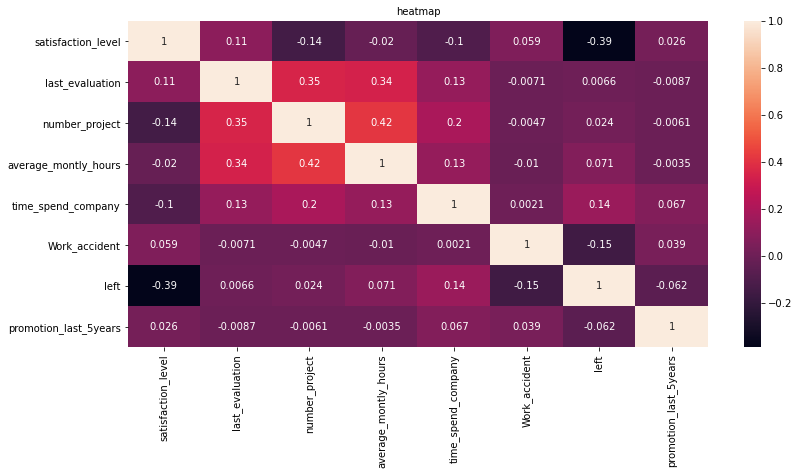

In [61]:
# рассчитаем и визуализируем корреляционную матрицу для количественных переменных  
# и определим две самые скоррелированные и две наименее скоррелированные переменные
heat_map = sns.heatmap(data_HR.corr(), annot=True)
heat_map.set_title('heatmap',
               fontsize=10)
print("Две самые скоррелированные переменные это average_montly_hours с number_project и left c satisfaction_level")
print("Две наименее скоррелированные переменные это Work_accident с time_spend_company и promotion_last_5years  c average_montly_hours ")


In [44]:
# количество сотрудников в каждом департаменте 
data_number_employee = data_HR.groupby("department")["satisfaction_level"].count().to_frame()
data_number_employee.rename(columns = {'satisfaction_level':'number employee'}, inplace = True)
print(data_number_employee)


             number employee
department                  
IT                      1227
RandD                    787
accounting               767
hr                       739
management               630
marketing                858
product_mng              902
sales                   4140
support                 2229
technical               2720


Text(0.5, 1.0, 'Distribution of employees by salary')

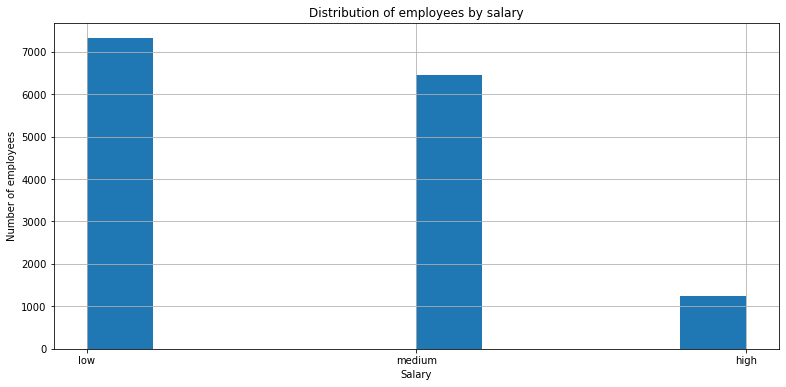

In [92]:
# распределение сотрудников по зарплатам 
plot_number_employees  = data_HR["salary"].hist()
plot_number_employees.set_xlabel("Salary")
plot_number_employees.set_ylabel("Number of employees")
plot_number_employees.set_title("Distribution of employees by salary")


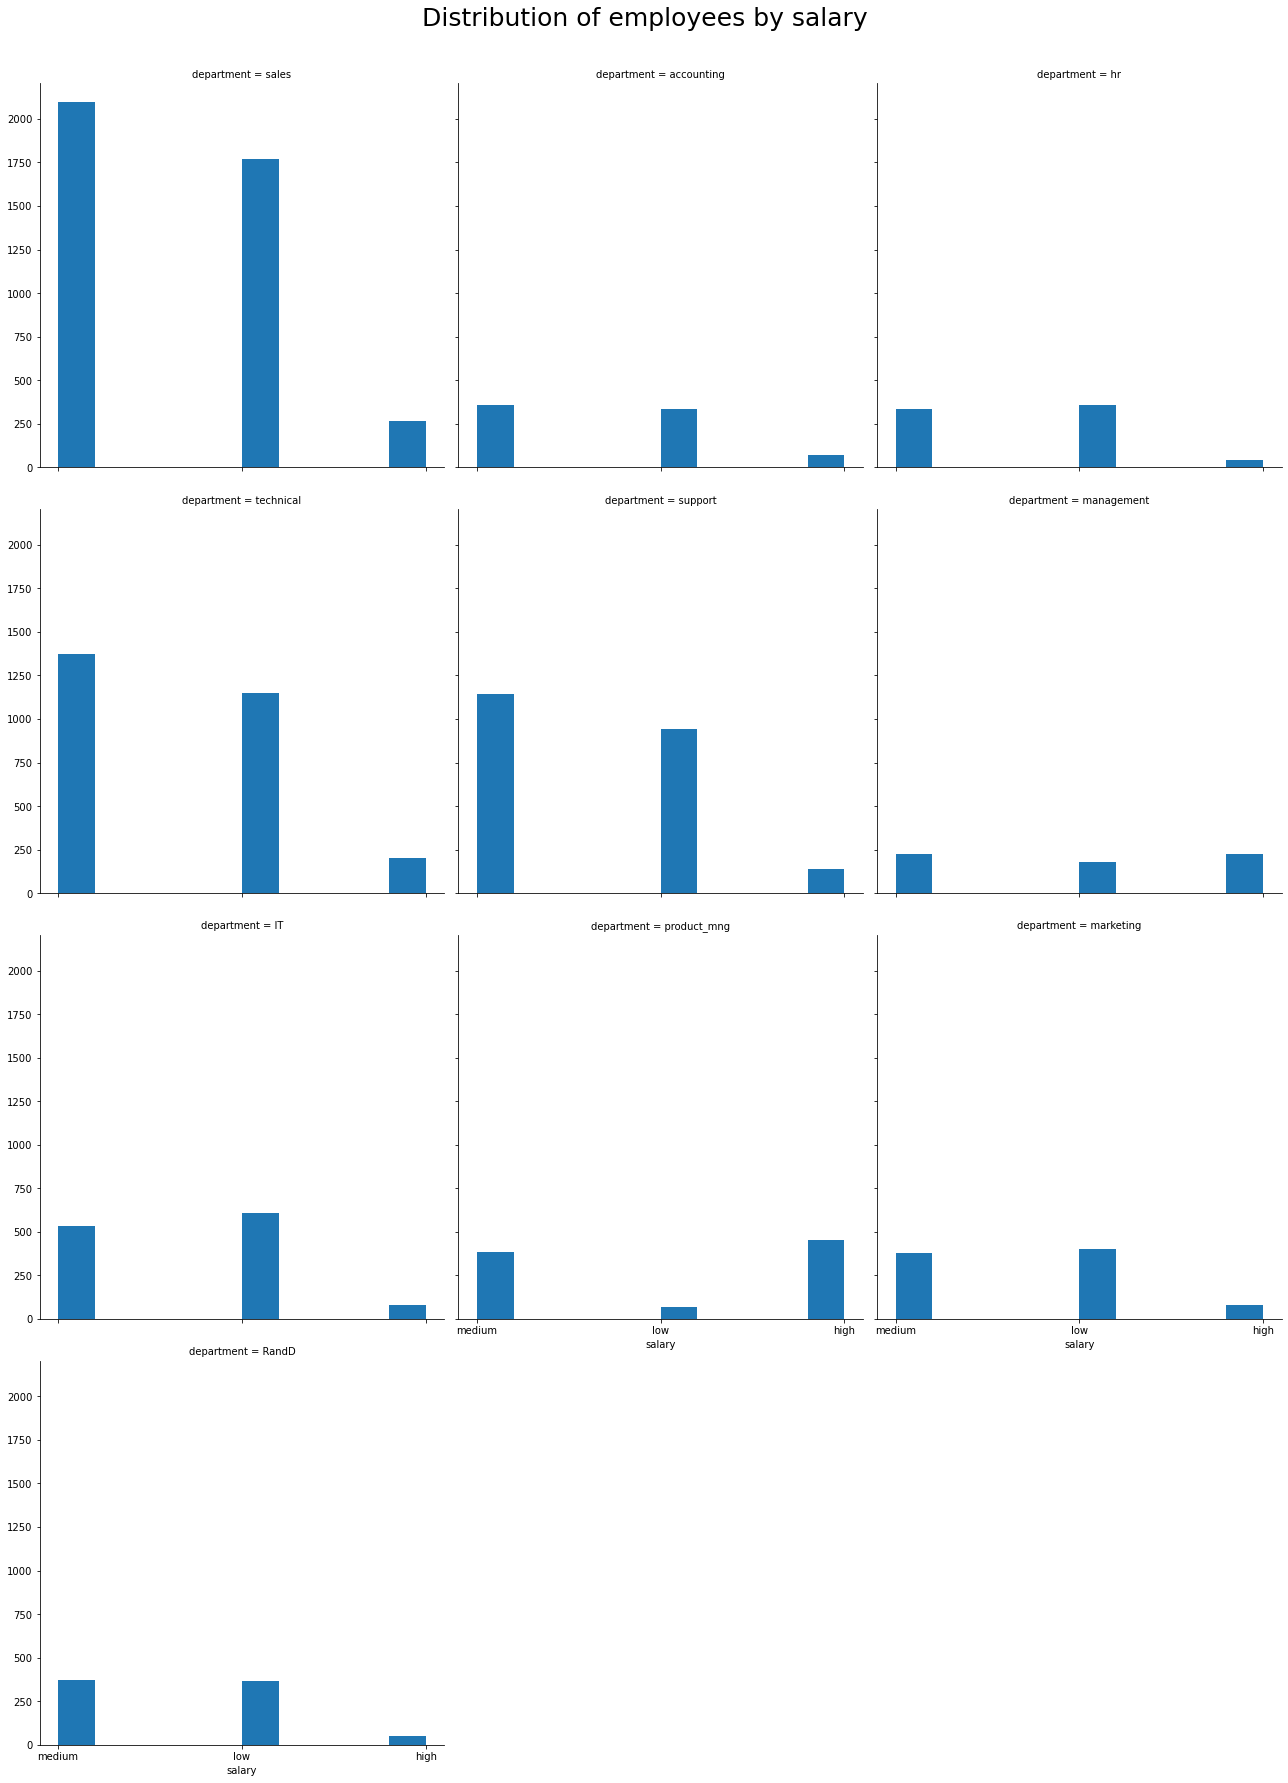

In [93]:
# распределение сотрудников по зарплатам в зависимости от департамента
g = sns.FacetGrid(data=data_HR, col='department', height=6, col_wrap=3)
g.map(plt.hist, 'salary');

g.fig.suptitle('Distribution of employees by salary',
               y = 1.03,
               fontsize = 25);
plt.show()


Основные статистические данные для average_montly_hours при высоком окладе
count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64
Основные статистические данные для average_montly_hours при низком окладе
count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64
Основные статистические данные для average_montly_hours при среднем окладе
count    6446.000000
mean      201.338349
std        49.344188
min        96.000000
25%       156.000000
50%       201.000000
75%       245.000000
max       310.000000
Name: average_montly_hours, dtype: float64


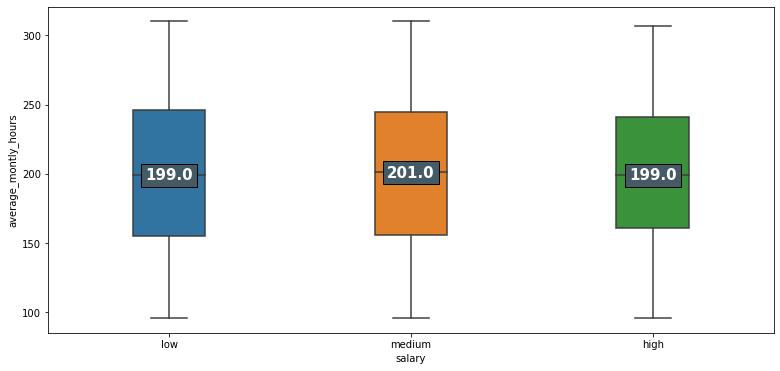

In [90]:
# проверка гипотезы о проведении на работе больше времени сотрудников с большим окладом
# построим график ящик с усами для сотрудников с высоким, средним и низким окладами 
box_plot = sns.boxplot(x="salary", y="average_montly_hours", data=data_HR, width=0.3)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

# покажем медианные значения на графике
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=15,
        color='white',
        bbox=dict(facecolor='#445A64'))

# Посчитаем основные статистические данные при разных окладах
data_HR_1 = data_HR[data_HR['salary'] == 'high']["average_montly_hours"].describe()
data_HR_2 = data_HR[data_HR['salary'] == 'low']["average_montly_hours"].describe()
data_HR_3 = data_HR[data_HR['salary'] == 'medium']["average_montly_hours"].describe()

print("Основные статистические данные для average_montly_hours при высоком окладе")
print(data_HR_1)
print("Основные статистические данные для average_montly_hours при низком окладе")
print(data_HR_2)
print("Основные статистические данные для average_montly_hours при среднем окладе")
print(data_HR_3)

# по основным статистическим данным видно, что сотрудники с маленьким окладом проводят на работе больше времени
# чем сотрудники с большим окладом
# гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не потверждается



In [50]:
# уволившие 
data_HR_layoff = data_HR[data_HR["left"] == 1]
# не уволившие
data_HR_NOT_layoff = data_HR[data_HR["left"] == 0]

# доля сотрудников с повышением за последние 5 лет среди уволившихся
percent_promotion_layoff = (data_HR_layoff[data_HR_layoff["promotion_last_5years"] == 1]["left"].count() / data_HR_layoff["left"].count()) * 100
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся - ",round(percent_promotion_layoff,2), "%")
# доля сотрудников с повышением за последние 5 лет среди не уволившихся
percent_promotion_NOT_layoff = (data_HR_NOT_layoff[data_HR_NOT_layoff["promotion_last_5years"] == 1]["left"].count() / data_HR_NOT_layoff["left"].count()) * 100
print("Доля сотрудников с повышением за последние 5 лет среди не уволившихся - ",round(percent_promotion_NOT_layoff, 2), "%")

# средняя степень удовлетворенности среди уволившихся
print("Средняя степень удовлетворенности среди уволившихся - ",round(data_HR_layoff["satisfaction_level"].mean(), 2))
# Средняя степень удовлетворенности среди не уволившихся
print("Средняя степень удовлетворенности среди не уволившихся - ",round(data_HR_NOT_layoff["satisfaction_level"].mean(), 2))

# средняя степень удовлетворенности среди уволившихся
print("Среднее количество проектов среди уволившихся - ",round(data_HR_layoff["number_project"].mean(), 2))
# Средняя степень удовлетворенности среди не уволившихся
print("Среднее количество проектов среди не уволившихся - ",round(data_HR_NOT_layoff["number_project"].mean(), 2))




Доля сотрудников с повышением за последние 5 лет среди уволившихся -  0.53 %
Доля сотрудников с повышением за последние 5 лет среди не уволившихся -  2.63 %
Средняя степень удовлетворенности среди уволившихся -  0.44
Средняя степень удовлетворенности среди не уволившихся -  0.67
Среднее количество проектов среди уволившихся -  3.86
Среднее количество проектов среди не уволившихся -  3.79


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# создадим новый Dataframe без столбцов department, salary, left
data_HR_new = data_HR.drop(['department','salary','left'], axis=1)
# создадим Dataframe из столбца left
data_class = data_HR["left"]

# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_HR_new, data_class, test_size=0.3)

# используем линейный дискриминантный анализ
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# оценим качество модели на тестовой выборке
print("Точность модели равна", round(accuracy_score(y_test, lda.predict(X_test)),2))




Точность модели равна 0.76
